In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdptoolbox
import sys 
sys.path.append('/home/navdeep/scripts/')
import tools as tl

In [2]:
#single restless Bandit 
class pm:
    n = 12 # number of states
    S = np.arange(n)
    R = np.zeros(n)
    R[0],R[6] = 1,-1
    R = np.transpose([R,R]) # reward matrix
    A = np.transpose([np.zeros(n),np.ones(n)]) # subsidy matrix  
    D = np.arange(n)/n
    D = np.transpose([D,D]) # safety matrix
    P0 = 2*np.identity(n)/7
    P1 = 2*np.identity(n)/7
    for i in range(6):
        P0[i,np.mod(i+1,n)],P0[i,np.mod(i-1,n)] = 4/7,1/7
        P1[i,np.mod(i+1,n)],P1[i,np.mod(i-1,n)] = 1/7,4/7
    for i in np.arange(6,n):
        P0[i,np.mod(i+1,n)],P0[i,np.mod(i-1,n)] = 1/7,4/7
        P1[i,np.mod(i+1,n)],P1[i,np.mod(i-1,n)] = 4/7,1/7
    P0[0],P1[0] = np.ones(n)/n, np.ones(n)/n    
    P = np.array([P0,P1])
    mu = 0
    

In [3]:
pm.P0

array([[0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
        0.08333333, 0.08333333],
       [0.14285714, 0.28571429, 0.57142857, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.14285714, 0.28571429, 0.57142857, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.14285714, 0.28571429, 0.57142857,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.14285714, 0.28571429,
        0.57142857, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.14285714,
        0.28571429, 0.57142857, 0.        , 0.        , 0.        ,
        0.        ,

In [15]:
def pol(pm,l=0): # policy
    rvi = mdptoolbox.mdp.RelativeValueIteration(pm.P, pm.R+pm.mu*pm.D+l*pm.A)
    rvi.run()
    

    return rvi.policy, rvi.average_reward
        

In [13]:
for mu in np.arange(-2,2,0.1):
    pm.mu = mu
    print(mu,pol(pm))

-2.0 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.9 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.7999999999999998 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.6999999999999997 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.5999999999999996 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.4999999999999996 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.3999999999999995 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.2999999999999994 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.1999999999999993 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-1.0999999999999992 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-0.9999999999999991 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-0.899999999999999 (0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1)
-0.7999999999999989 (0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1)
-0.6999999999999988 (0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1)
-0.5999999999999988 (0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1)
-0.49999999999999867 (0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1)
-0.3999999999999986 (0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1)
-0.2999999999999985 (0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1)
-0.1

In [6]:
def stat(pm,pi):
    P = np.array([pm.P[a][i] for i,a in enumerate(pi)])

    for i in range(10):
        P = P@P
    d = np.round(np.mean(P, axis=0)*10000)/10000
    return d

In [7]:
stat(pm,pol(pm))

array([0.1278, 0.1118, 0.1211, 0.1048, 0.0821, 0.0578, 0.0331, 0.033 ,
       0.0574, 0.0804, 0.0978, 0.0932])

Text(0.5, 1.0, 'Lagrange')

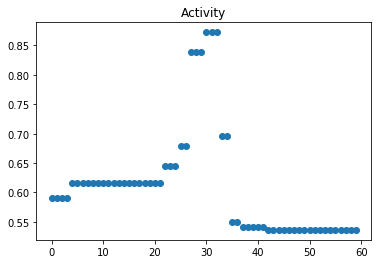

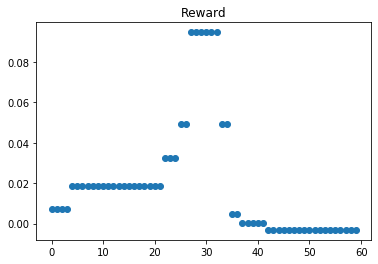

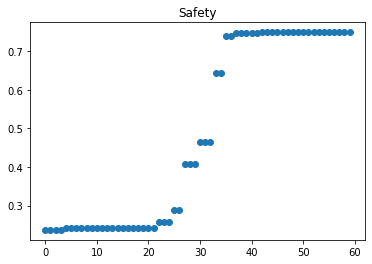

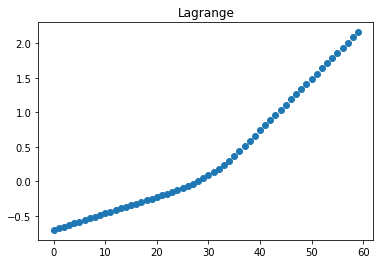

In [24]:
pm.mu=0
A = []
for mu in np.arange(-3,3,0.1):
    pm.mu = mu
    pi,l = pol(pm,0)
    d = stat(pm,pi)
    a = np.sum(d*pi)
    r = np.sum(pm.R[:,0]*d)
    c = np.sum(pm.D[:,0]*d)
    A.append([a,r,c,l])
A = np.array(A)    
plt.plot(A[::,0],'o')
plt.title('Activity')
plt.figure()
plt.plot(A[::,1],'o')
plt.title('Reward')
plt.figure()
plt.plot(A[::,2],'o')
plt.title('Safety')
plt.figure()
plt.plot(A[::,3],'o')
plt.title('Lagrange')

In [23]:
tl.whittle(pm)

-4 -4 1.0 12 5 0.9166666666666666 0.4166666666666667 [2 4 3 2 1 0 4 4 4 4 2 1]
-4 -4 0.5 12 6 1.0 0.0 [ 8 12 10  8  6  4 11 12 12 12  8  6]
-4 -4 0.25 12 8 1.0 0.0 [16 23 19 15 12  7 22 24 24 24 15 12]
-4 -4 0.125 12 10 1.0 0.0 [32 46 37 30 24 14 44 47 47 47 29 23]
-4 -4 0.0625 12 11 1.0 0.0 [64 91 74 59 48 28 88 93 93 94 58 45]
-4 -4 0.03125 12 12 1.0 0.0 [128 181 148 118  95  56 176 185 186 187 115  90]


array([ 0.     ,  1.65625,  0.625  , -0.3125 , -1.03125, -2.25   ,
        1.5    ,  1.78125,  1.8125 ,  1.84375, -0.40625, -1.1875 ])

In [29]:
A

array([[ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.    , -0.0127],
       [ 0.0142, -0.0011],
       [ 0.0142, -0.0011],
       [ 0.0142, -0.0011],
       [ 0.0142, -0.0011],
       [ 0.0518,  0.0164],
       [ 0.1215,  0.0395],
       [ 0.3618,  0.0947],
       [ 0.3618,  0.0947],
       [ 0.6385,  0.0947],
       [ 0.6385,  0.0947],
       [ 0.6385,  0.0947],
       [ 0.8785,  0.0395],
       [ 0.9479,  0.0164],
       [ 0.9857, -0.0011],
       [ 0.9857, -0.0011],
       [ 0.9857, -0.0011],
       [ 0.9857, -0.0011],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
       [ 1.0001, -0.0127],
 

In [27]:
P[2]

array([5.00000000e-001, 5.69618908e-306, 5.56268465e-309, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.00000000e-001])

In [28]:
P

array([[5.00000000e-001, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 5.56268465e-309, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 5.69618908e-306, 5.56268465e-309,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 2.91360071e-303, 5.69618908e-306,
        5.56268465e-309, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 9.92566643e-301, 2.91360071